In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report


In [2]:
df=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\task5\students.csv")

In [3]:
df

,Study Hours,Attendance,Pass
0,12,90,1
1,4,60,0
2,10,85,1
3,2,40,0
4,8,75,1
5,1,30,0
6,15,95,1
7,5,55,0
8,9,80,1
9,6,65,1


In [4]:
#Display the the few rows
print("First 5 rows of dataset")
print(df.head())

First 5 rows of dataset
   Study Hours  Attendance  Pass
0           12          90     1
1            4          60     0
2           10          85     1
3            2          40     0
4            8          75     1


In [5]:
# chech for missing values 
print("missing values ")
df.isnull().sum()

missing values 


Study Hours    0
Attendance     0
Pass           0
dtype: int64

In [6]:
# Display the data information
print('Data information')
print(df.info())

Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Study Hours  30 non-null     int64
 1   Attendance   30 non-null     int64
 2   Pass         30 non-null     int64
dtypes: int64(3)
memory usage: 852.0 bytes
None


In [7]:
# define feature (x) and target variable(y)
X=df[['Study Hours','Attendance']]
y=df['Pass']

In [8]:
# check X and y 
X

,Study Hours,Attendance
0,12,90
1,4,60
2,10,85
3,2,40
4,8,75
5,1,30
6,15,95
7,5,55
8,9,80
9,6,65


In [9]:
y

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    0
16    1
17    1
18    1
19    0
20    1
21    1
22    0
23    0
24    1
25    1
26    0
27    1
28    1
29    1
Name: Pass, dtype: int64

In [10]:
# split data into train and test 
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)


In [11]:
print(f"Training samples:{X_train.shape[0]},Testing Sample:{X_test.shape[0]}")

Training samples:24,Testing Sample:6


In [12]:
# Initialize  and train the model
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [13]:
# make predictions 
y_pred=model.predict(X_test)

In [14]:
#print the accuracy 
accuracy=accuracy_score(y_test,y_pred)
print(f"Model accuracy:{accuracy:.2f}")

Model accuracy:1.00


In [15]:
# confussion Matrix
cm=confusion_matrix(y_test,y_pred)
print("\n confusion Matrix")
print(cm)


 confusion Matrix
[[2 0]
 [0 4]]


In [16]:
# classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



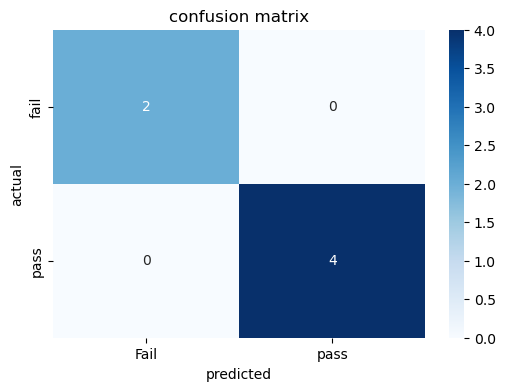

In [17]:
# plot confusion matrix 
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues',xticklabels=['Fail','pass'],yticklabels=['fail','pass'])
plt.xlabel('predicted')
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [27]:
# Sentiment Analysis with Natural Language Processing


In [20]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['Review Text'].apply(lambda x: word_tokenize(x, language='english'))


In [21]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
df

,Review Text,Sentiment,tokens,cleaned_review
0,i love this product,positive,"[love, product]",love product
1,worst purchase ever,negative,"[worst, purchase, ever]",worst purchase ever
2,absolutely fantastic experience,positive,"[absolutely, fantastic, experience]",absolutely fantastic experience
3,not worth the price,negative,"[worth, price]",worth price
4,highly recommend to everyone,positive,"[highly, recommend, everyone]",highly recommend everyone
5,terrible customer service,negative,"[terrible, customer, service]",terrible customer service
6,very satisfied with my order,positive,"[satisfied, order]",satisfied order
7,the item broke after one day,negative,"[item, broke, one, day]",item broke one day
8,top quality and great value,positive,"[top, quality, great, value]",top quality great value
9,do not buy this,negative,[buy],buy


In [23]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\task5\data.csv")

# Lowercase
df['Review Text'] = df['Review Text'].str.lower()

# Remove punctuation and special characters
df['Review Text'] = df['Review Text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Tokenization
df['tokens'] = df['Review Text'].apply(nltk.word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Rejoin tokens for vectorization
df['cleaned_review'] = df['tokens'].apply(lambda x: ' '.join(x))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review']).toarray()
y = df['Sentiment'].map({'positive': 1, 'negative': 0})  # Binary encoding


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
    Positive       0.17      1.00      0.29         1

    accuracy                           0.17         6
   macro avg       0.08      0.50      0.14         6
weighted avg       0.03      0.17      0.05         6



C:\Users\Asus\.conda\envs\demo\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\.conda\envs\demo\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\.conda\envs\demo\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


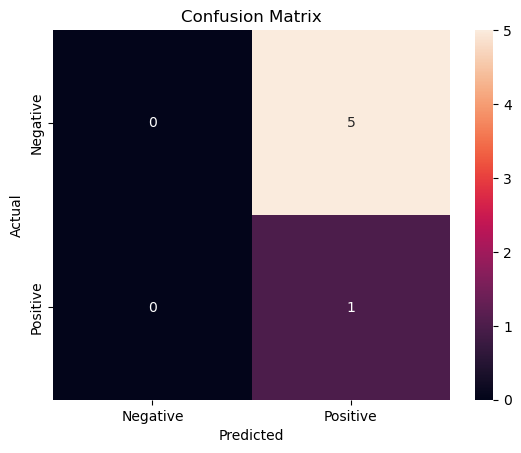

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [29]:
df[['Review Text', 'cleaned_review', 'Sentiment']].to_csv('preprocessed_reviews.csv', index=False)


In [30]:
import joblib
joblib.dump(model, 'sentiment_model.pkl')


['sentiment_model.pkl']

In [31]:
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.17
Precision: 0.17
Recall: 1.00
F1-Score: 0.29
